#Titanic Survival Prediction – Complete Machine Learning Pipeline

### Data Analysis and Preprocessing

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic Information and Summary Statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

In [4]:
# Check for Missing Values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


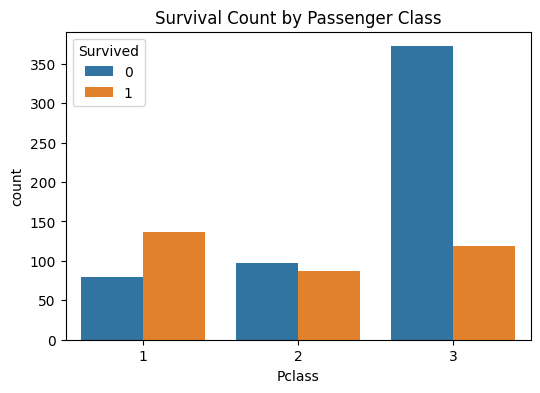

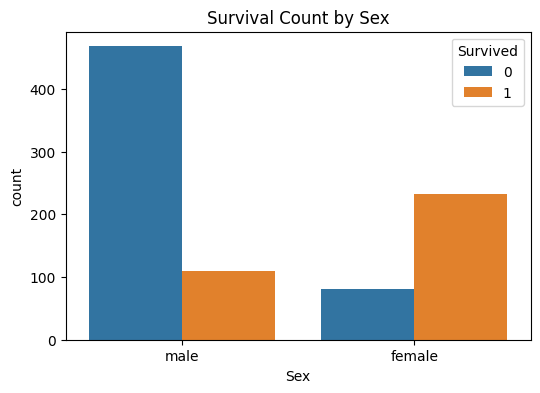

In [5]:
# Univariate Analysis - Categorical Features
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()

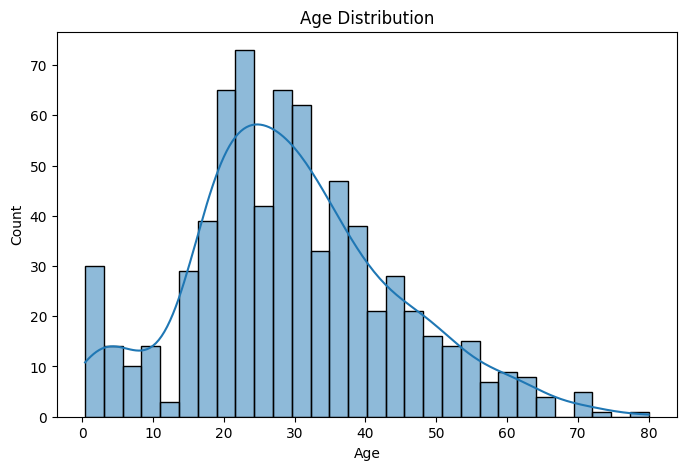

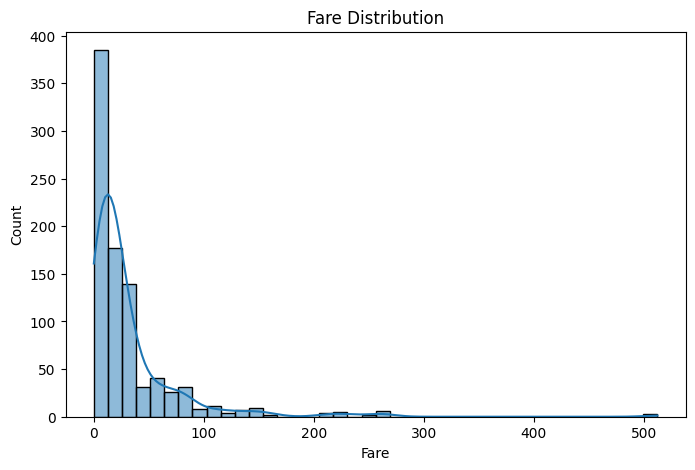

In [6]:
# Univariate Analysis - Numerical Features
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title("Fare Distribution")
plt.show()

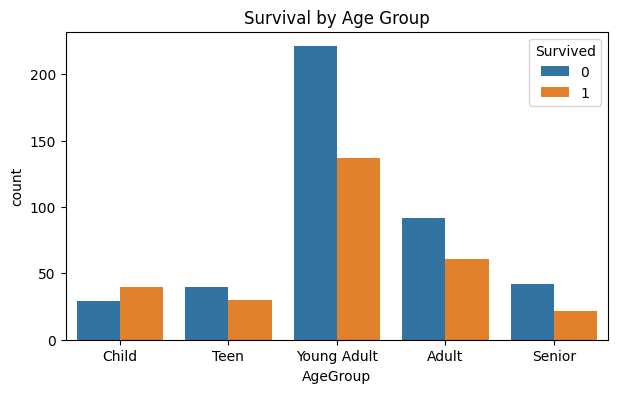

In [7]:
# Bivariate Analysis - Age Group vs Survival
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80],
                        labels=['Child','Teen','Young Adult','Adult','Senior'])
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title("Survival by Age Group")
plt.show()

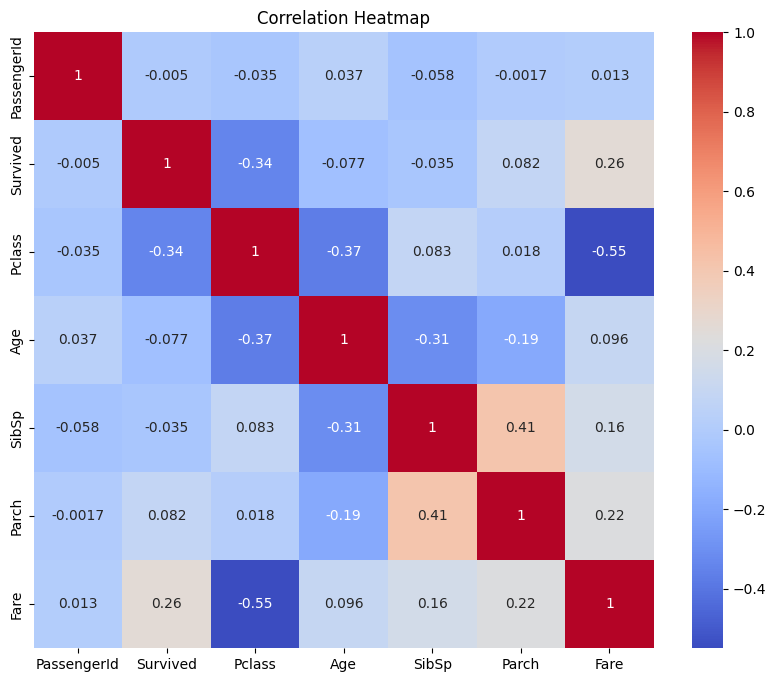

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [10]:
# Feature Engineering
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [11]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [12]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Sex','Embarked','Title'], drop_first=True)

In [13]:
# Drop Unused Columns
df.drop(columns=['PassengerId','Name','Ticket','AgeGroup'], inplace=True)

In [14]:
# Final Dataset Check
print("\nProcessed Dataset Preview:")
print(df.head())


Processed Dataset Preview:
   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500           2        0   
1         1       1  38.0      1      0  71.2833           2        0   
2         1       3  26.0      0      0   7.9250           1        1   
3         1       1  35.0      1      0  53.1000           2        0   
4         0       3  35.0      0      0   8.0500           1        1   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  


In [15]:
# Save processed dataset for model training
df.to_csv("/content/processed_titanic.csv", index=False)
print("\n Data preprocessing complete. Saved to '/content/processed_titanic.csv'.")


 Data preprocessing complete. Saved to '/content/processed_titanic.csv'.


###Model Training

In [16]:
# Split Dataset into Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (712, 14)
Test Set Shape: (179, 14)


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
# Train, Cross-Validate, and Evaluate Models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    # Use scaled data for LR and SVM, raw for RF
    if name in ["Logistic Regression", "Support Vector Machine"]:
        X_train_use, X_test_use = X_train_scaled, X_test_scaled
    else:
        X_train_use, X_test_use = X_train, X_test

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Train and predict
    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)
    y_proba = model.predict_proba(X_test_use)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, auc, mean_cv_score])

    print(f"\n{name} Performance:")
    print(f"Accuracy (Test Set): {acc:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Mean CV Accuracy: {mean_cv_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy (Test Set): 0.8547
AUC Score: 0.8813
Mean CV Accuracy: 0.8175

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Confusion Matrix:
[[100  10]
 [ 16  53]]

Random Forest Performance:
Accuracy (Test Set): 0.8212
AUC Score: 0.8253
Mean CV Accuracy: 0.7993

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[95 15]
 [17 52]]

Support Vecto

In [21]:
# Compare Model Results
import pickle
results_df = pd.DataFrame(results, columns=["Model", "Test Accuracy", "AUC", "Mean CV Accuracy"])
print("\nModel Comparison:")
print(results_df.sort_values(by="Test Accuracy", ascending=False))
with open("results.pkl", "wb") as f:
    pickle.dump(results_df, f)


Model Comparison:
                    Model  Test Accuracy       AUC  Mean CV Accuracy
0     Logistic Regression       0.854749  0.881291          0.817483
2  Support Vector Machine       0.837989  0.841634          0.824446
1           Random Forest       0.821229  0.825296          0.799281


In [22]:
# Select Best Model
best_model_name = results_df.sort_values(by="Test Accuracy", ascending=False).iloc[0]['Model']
print(f"\nBest Model Selected: {best_model_name}")

best_model = models[best_model_name]
if best_model_name in ["Logistic Regression", "Support Vector Machine"]:
    best_model.fit(X_train_scaled, y_train)
else:
    best_model.fit(X_train, y_train)


Best Model Selected: Logistic Regression


In [23]:
# Save Best Model
import pickle
pickle.dump(best_model, open('model.pkl', 'wb'))
print("\n Best model saved as 'model.pkl'.")


 Best model saved as 'model.pkl'.


In [24]:
# Save Scaler
if best_model_name in ["Logistic Regression", "Support Vector Machine"]:
    pickle.dump(scaler, open('scaler.pkl', 'wb'))
    print(" Scaler saved as 'scaler.pkl'.")

 Scaler saved as 'scaler.pkl'.
